<a href="https://colab.research.google.com/github/misbah38/DSAI-Batch-4/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Misbah Sabir

Data science Internee

<center>

***TASK 2 ***

**Credit Card Fraud Dtetection** </center>


### EDA

In [ ]:
# Import the Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# replace all the NAN cells with zero
num_cols = [col for col in df.columns]
df[num_cols] = df[num_cols].fillna(0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

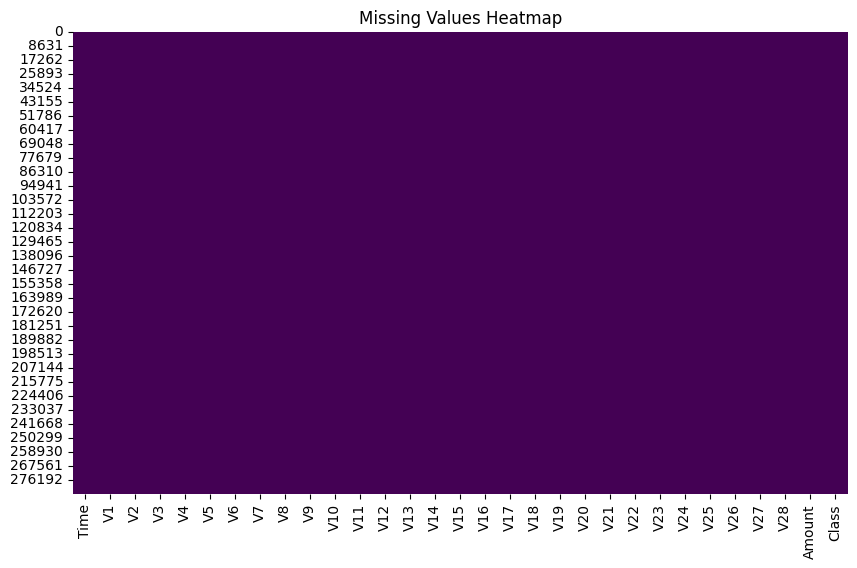

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Create the heatmap
plt.title('Missing Values Heatmap')  # Set the title
plt.show()  # Show the plot

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['V1'].unique()
df['V2'].unique()
df['Amount'].unique()
df['Class'].unique()

array([0, 1])

In [ ]:
# The code is assigning the "Class" column of the DataFrame to the variable target.
# selecting numeric columns from a DataFrame (df) where the column's data type is not "object"
# (presumably string or categorical) and the number of unique values in the column is greater than 5.
# It then assigns these selected columns to the num_cols list.

num_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() > 5]#  It checks if the number of unique values in the current column (col) is greater than 5
                                          #  It checks if the data type of the current column (col) is not "O" (assuming "O" refers to object data type, which typically represents string or categorical data).
target = df["Class"] # The "Class" column is assigned to the target variable, assuming it exists in the DataFrame

num_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

#### Numerical Variable Analysis

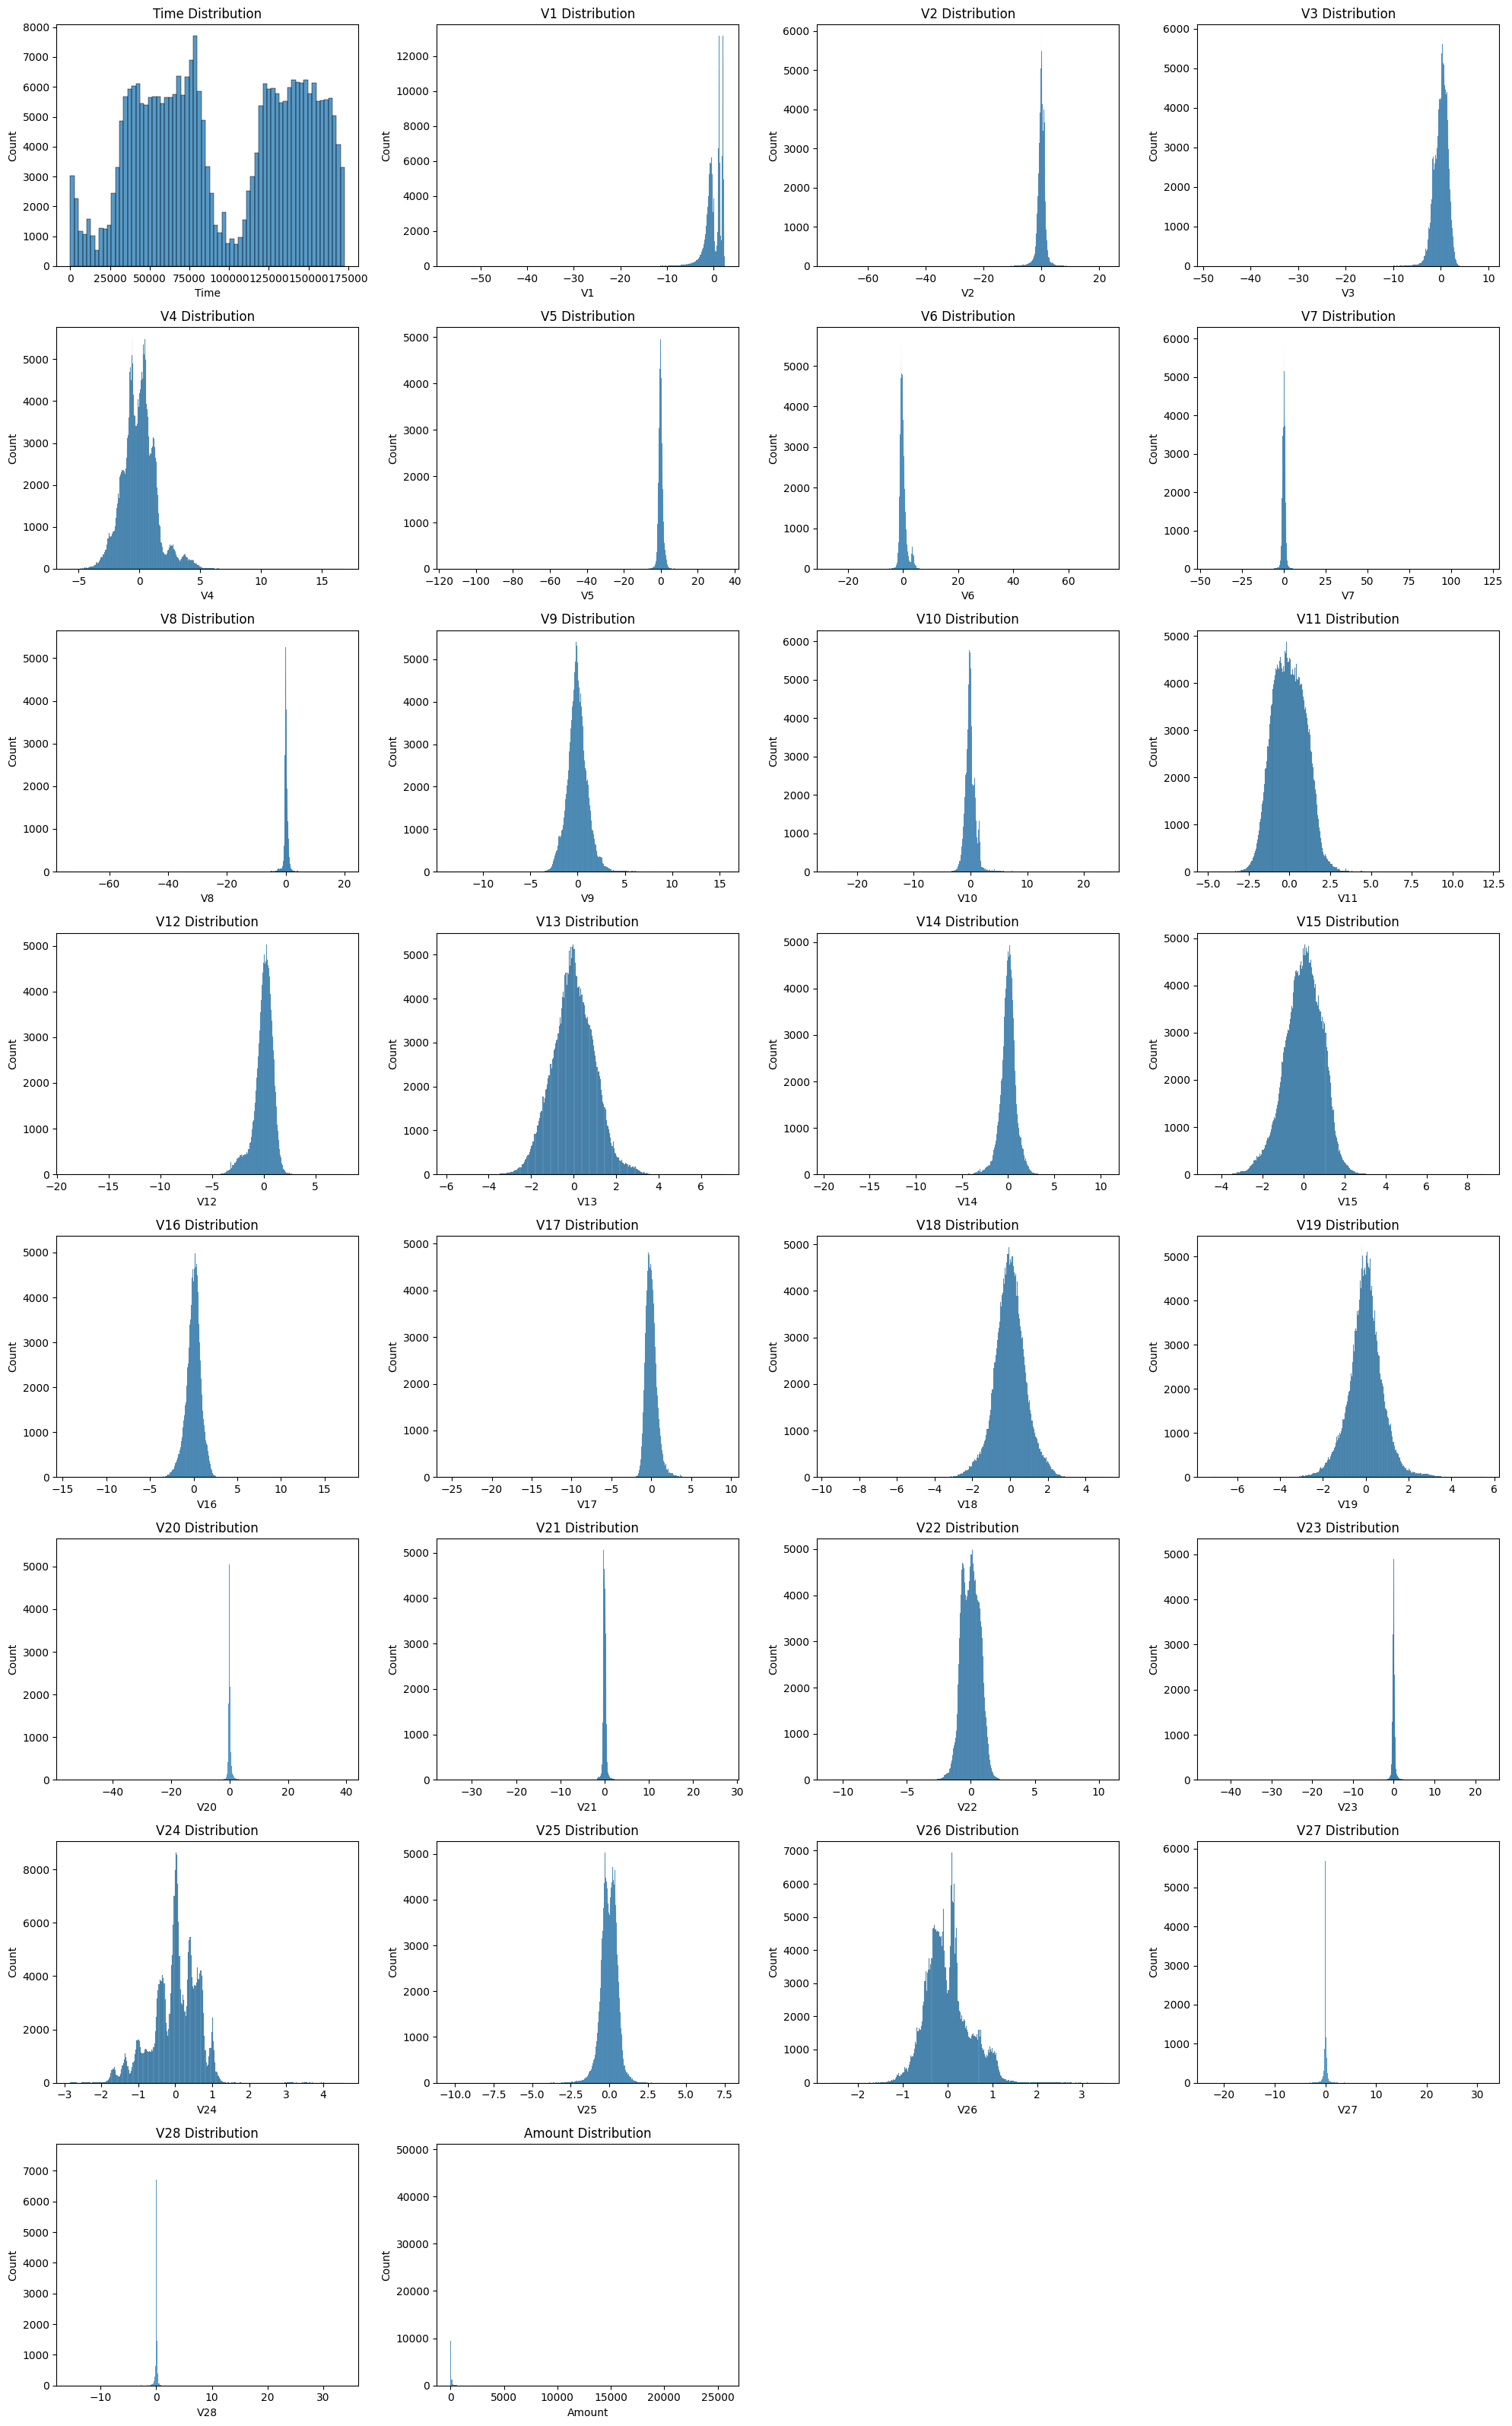

In [ ]:
# Histograms of Numericals
# n_cols and n_rows are set to determine the number of columns and rows in the grid of histograms
n_cols = 4
# n_cols is set to 4, and n_rows is calculated by dividing the length of num_cols by n_cols and adding 1 if there's a remainder.
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

for i, column in enumerate(num_cols):
    row_index = i // n_cols
    col_index = i % n_cols

    sns.histplot(df[column], ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(f"{column} Distribution")

# if there is any empty graph, we delete
for i in range(len(num_cols), n_cols * n_rows):
    fig.delaxes(plt.gca())

plt.tight_layout()
plt.show()

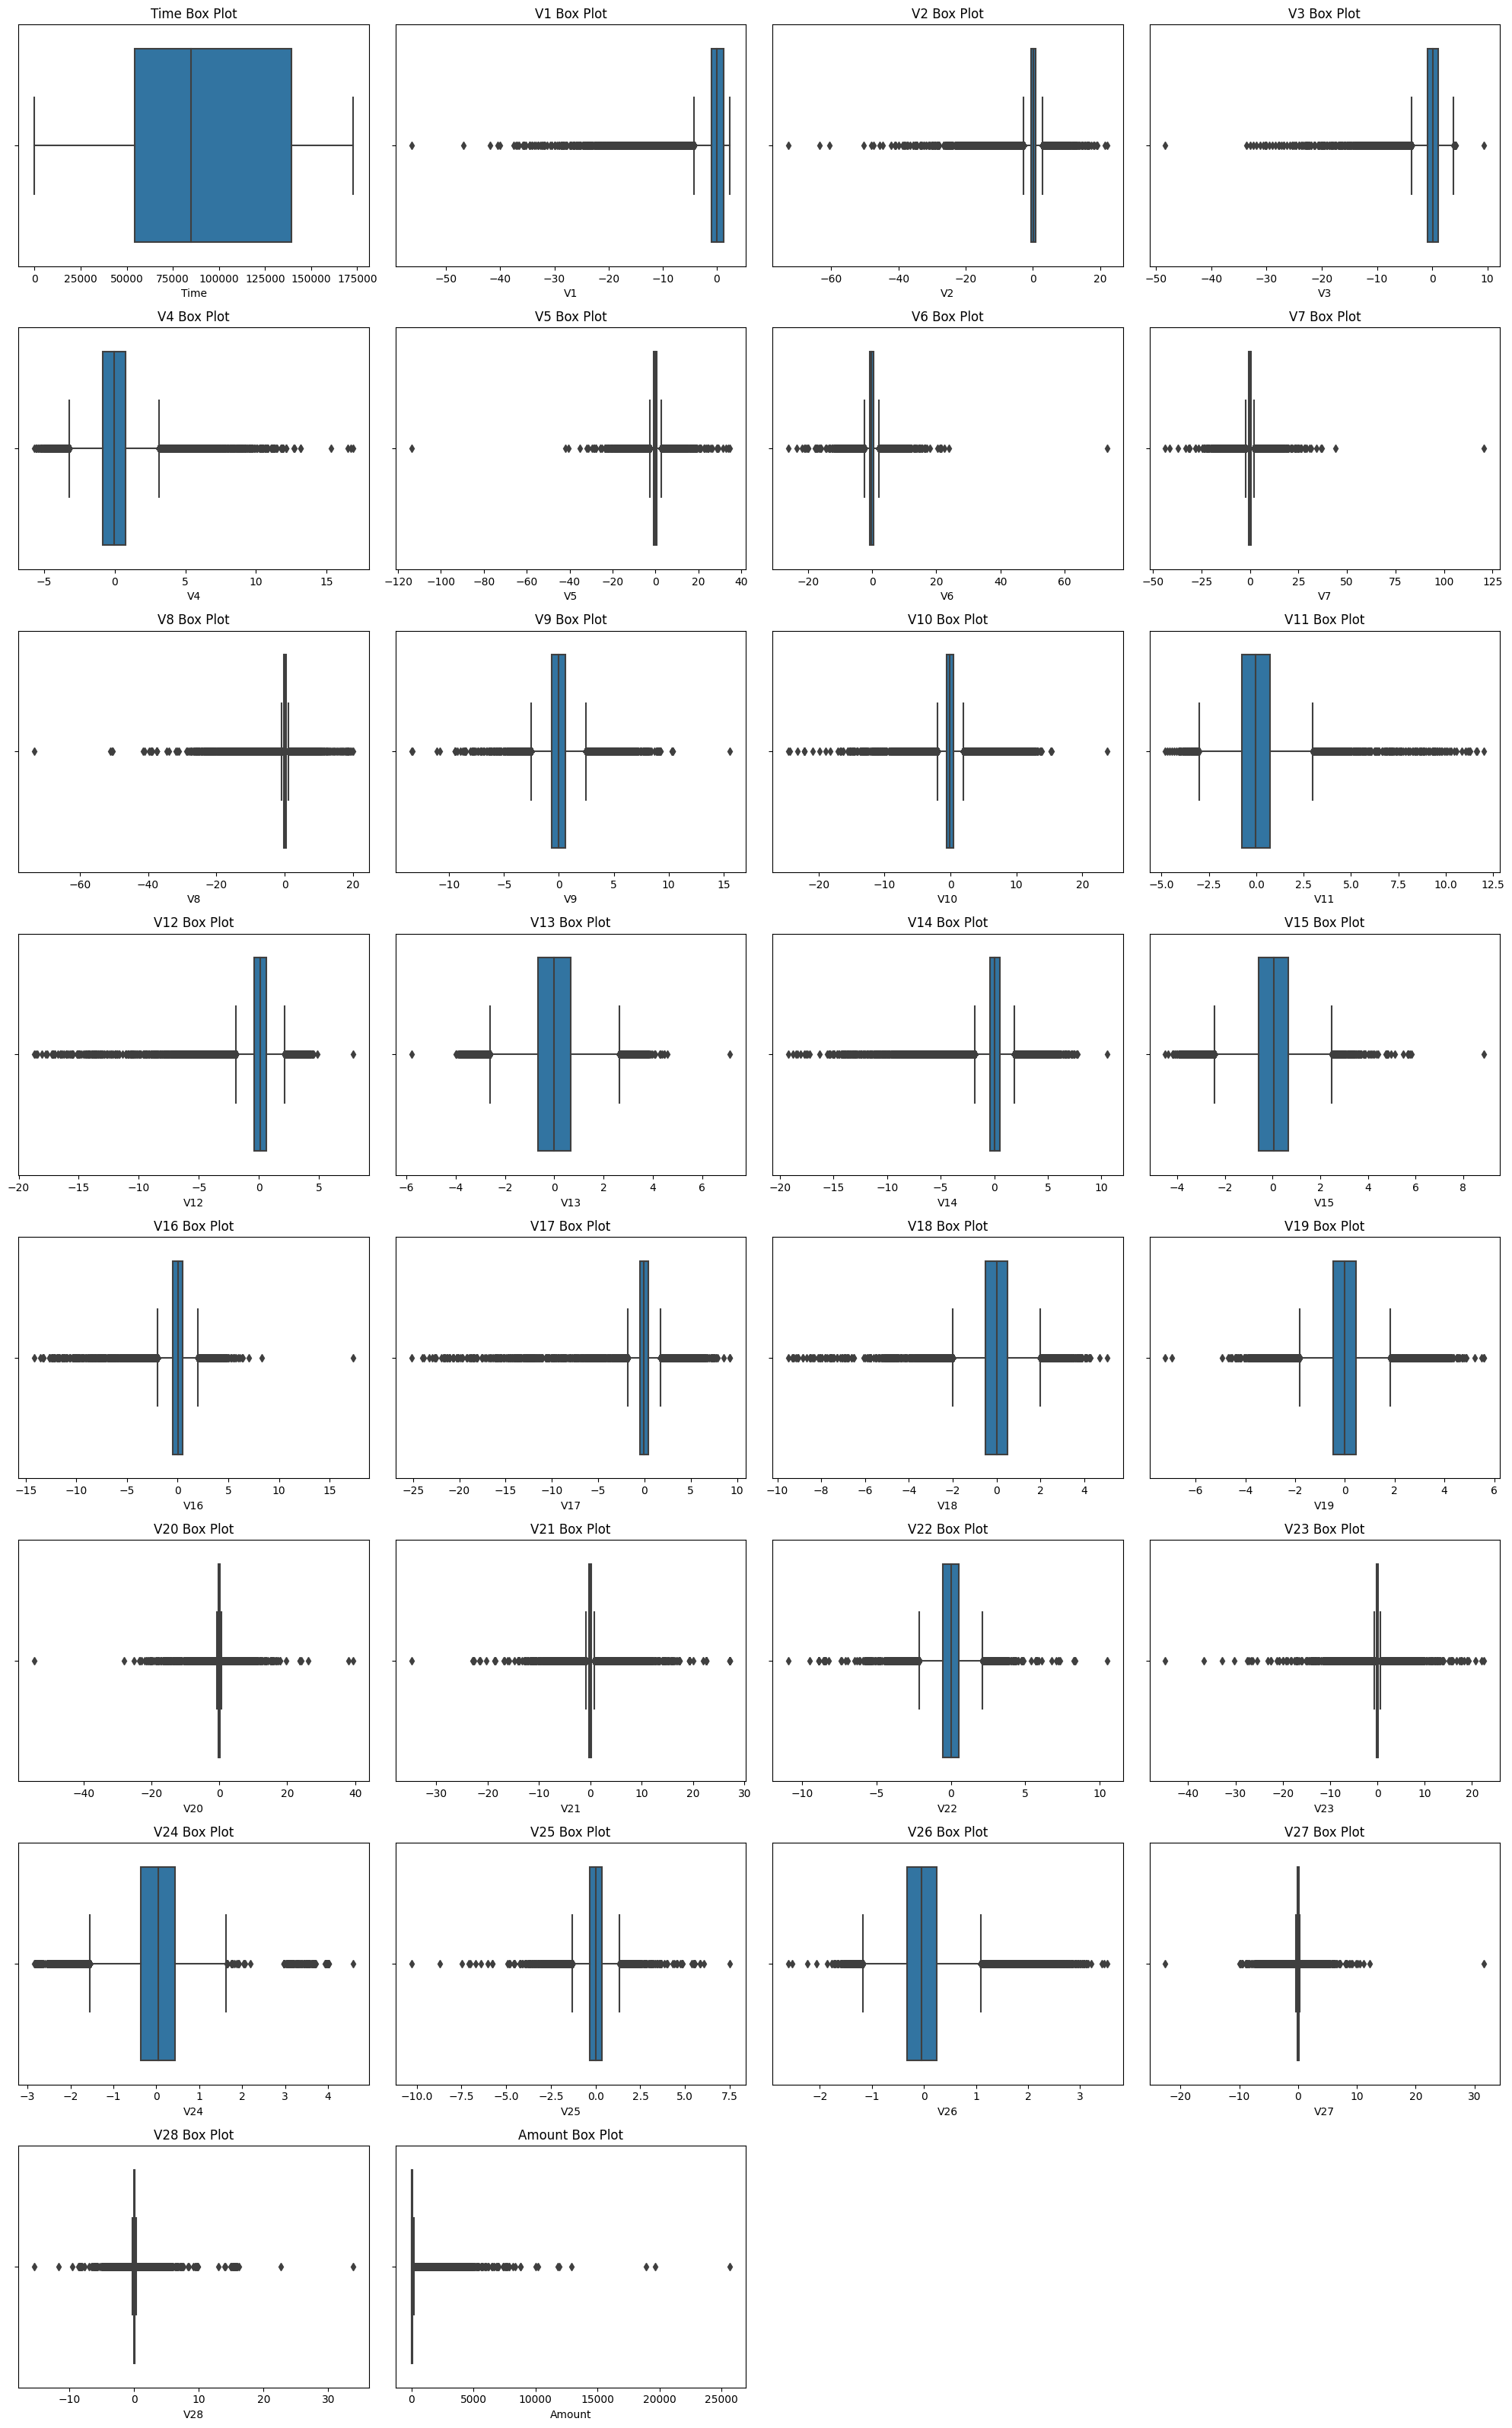

In [ ]:
# Box Plot of Numericals
# n_cols and n_rows are set to determine the number of columns and rows in the grid of histograms
n_cols = 4
# n_cols is set to 4, and n_rows is calculated by dividing the length of num_cols by n_cols and adding 1 if there's a remainder.
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

for i, column in enumerate (num_cols):
    row_index=i//n_cols
    col_index=i%n_cols

    sns.boxplot(x=df[column], ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(f"{column} Box Plot")

for i in range(len(num_cols), n_cols * n_rows):
    fig.delaxes(plt.gca())

plt.tight_layout()
plt.show()

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# in percentage
(df['Class'].value_counts()*100 / df.shape[0])
# this shows that 99.8% belongs to zero Class(cleared) and 0.17% belongs to class 1 (frauds)

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [ ]:
df.groupby("Class")[num_cols].mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Model Building

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2 ,random_state=20)


#### Random Forest Classifier

In [ ]:
# Random Forest Classifier modelling
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred = RFC_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
accuracy=accuracy_score(y_test, y_pred)
report=classification_report(y_test,y_pred) # compute classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.95      0.78      0.86        88

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)
confusion

array([[56870,     4],
       [   19,    69]])

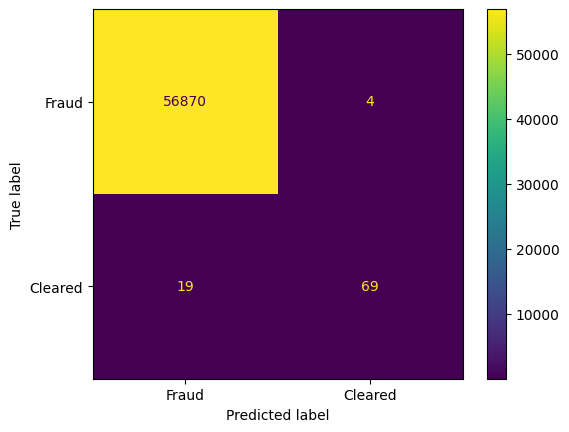

In [ ]:
#plot the confusion matrix
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels = ['Fraud','Cleared'])
matrix.plot()

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
#normalize the Data
X=X/255.0
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-0.005333,-0.000285,0.009946,0.005405,-0.001327,0.001813,0.000940,0.000387,0.001427,...,0.000986,-0.000072,0.001090,-0.000433,0.000262,0.000504,-0.000742,0.000524,-0.000083,0.586745
1,0.000000,0.004674,0.001044,0.000653,0.001757,0.000235,-0.000323,-0.000309,0.000334,-0.001002,...,-0.000271,-0.000885,-0.002505,0.000397,-0.001333,0.000656,0.000494,-0.000035,0.000058,0.010549
2,0.003922,-0.005327,-0.005256,0.006954,0.001489,-0.001973,0.007061,0.003104,0.000971,-0.005940,...,0.002059,0.000973,0.003026,0.003566,-0.002703,-0.001285,-0.000545,-0.000217,-0.000234,1.484941
3,0.003922,-0.003789,-0.000726,0.007031,-0.003385,-0.000040,0.004891,0.000932,0.001480,-0.005439,...,-0.000816,-0.000425,0.000021,-0.000746,-0.004610,0.002539,-0.000870,0.000246,0.000241,0.484314
4,0.007843,-0.004542,0.003442,0.006073,0.001581,-0.001597,0.000376,0.002325,-0.001061,0.003207,...,0.001602,-0.000037,0.003131,-0.000539,0.000554,-0.000808,0.001970,0.000860,0.000844,0.274471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,677.592157,-0.046593,0.039497,-0.038568,-0.008105,-0.021037,-0.010223,-0.019287,0.028648,0.007508,...,0.005788,0.000837,0.000439,0.003978,-0.001997,0.005635,0.000981,0.003701,0.003230,0.003020
284803,677.596078,-0.002874,-0.000216,0.007981,-0.002896,0.003405,0.004151,0.000095,0.001156,0.002293,...,0.000234,0.000840,0.003625,0.000049,-0.003985,-0.002379,-0.001550,0.000269,-0.000210,0.097216
284804,677.600000,0.007528,-0.001181,-0.012744,-0.002188,0.010316,0.011887,-0.001164,0.002778,0.001696,...,0.000005,0.000910,0.002268,-0.000147,0.002510,0.001042,-0.000343,0.000017,-0.000104,0.266196
284805,677.600000,-0.000943,0.002080,0.002755,0.002705,-0.001482,0.002446,-0.002691,0.002663,0.001538,...,0.000500,0.001040,0.003137,-0.000640,0.000483,-0.002232,0.002144,0.000427,0.000410,0.039216


In [ ]:
y=keras.utils.to_categorical(y,num_classes=10) #one hot encode label
y

array([[[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
#split the data into training and validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Define a simple neural network model
model=keras.Sequential([
    layers.Input(shape=(X_train.shape[1])),
    #layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2), #Adding dropout for regularization
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#Training the model
history=model.fit(X_train,y_train, epochs=10, batch_size=32,validation_data=(X_val,y_val))


Epoch 1/10
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0417 - accuracy: 0.9977 - val_loss: 0.0154 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0160 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9983
Epoch 3/10
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.0130 - val_accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0137 - accuracy: 0.9983 - val_loss: 0.0125 - val_accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 25s 4ms/step - loss: 0.0149 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 21s 3ms/step - loss: 0.0139 - accuracy: 0.9983 - val_loss: 0.0126 - val_accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 20s 3ms/step - loss: 0.0137 - accuracy: 0.9983 - val_loss: 0.0156 - val_ac

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               3968      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 12874 (50.29 KB)
Trainable params: 12874 (50.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


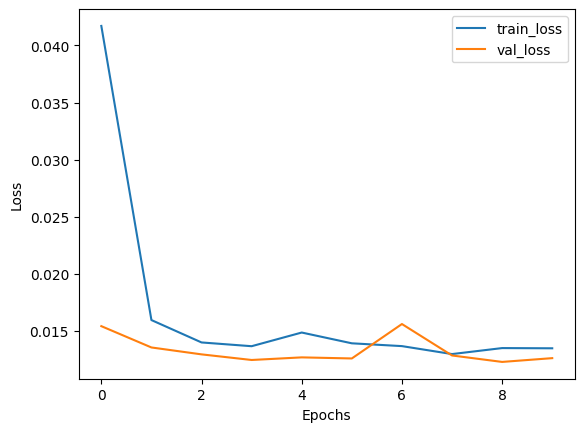

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
import sys

In [ ]:
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
